In [1]:
from source import seasonalregressor
from source import data_wrangle
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline

advanced = data_wrangle.read_all_advanced('./data/advanced')
pergame  = data_wrangle.read_all_pergame('./data/per_game')
seasonal = data_wrangle.clean_and_join_seasonal_dataframe(advanced, pergame)
demographic = data_wrangle.read_demographic_data('./data/player_data.csv')
fullstats = data_wrangle.add_years_in_league(seasonal, demographic)


In [2]:
import importlib

In [4]:
cols_to_train_from_correlation = ['WS',
 'OWS',
 'VORP',
 'DWS',
 'MP_total',
 'PS/G',
 'FG',
 'MP_pergame',
 'GS',
 'FT',
 '2P',
 'FTA',
 'FGA',
 '2PA',
 'DRB']

In [11]:
importlib.reload(seasonalregressor)

<module 'source.seasonalregressor' from '/Users/kv/workspace/kv-capstone/NBAwinshare/source/seasonalregressor.py'>

In [8]:
sr = seasonalregressor.SeasonalRegressor(columns_to_train=cols_to_train_from_correlation)
sr = sr.fit(fullstats,demographic)

Number of players:  578  with full season data for seasons: {1, 2, 3, 4, 5}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 5
Number of players:  496  with full season data for seasons: {1, 2, 3, 4, 5, 6}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 6
Number of players:  421  with full season data for seasons: {1, 2, 3, 4, 5, 6, 7}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 7
Number of players:  355  with full season data for seasons: {1, 2, 3, 4, 5, 6, 7, 8}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DW

Feature ranking:
1. feature 0 | WS | (0.351034)
2. feature 1 | OWS | (0.159805)
3. feature 2 | VORP | (0.093928)
4. feature 14 | DRB | (0.059775)
5. feature 8 | GS | (0.044660)
6. feature 4 | MP_total | (0.040274)
7. feature 7 | MP_pergame | (0.036822)
8. feature 6 | FG | (0.032778)
9. feature 3 | DWS | (0.029325)
10. feature 5 | PS/G | (0.029269)
11. feature 10 | 2P | (0.027617)
12. feature 9 | FT | (0.026638)
13. feature 11 | FTA | (0.025268)
14. feature 12 | FGA | (0.023351)
15. feature 13 | 2PA | (0.019457)


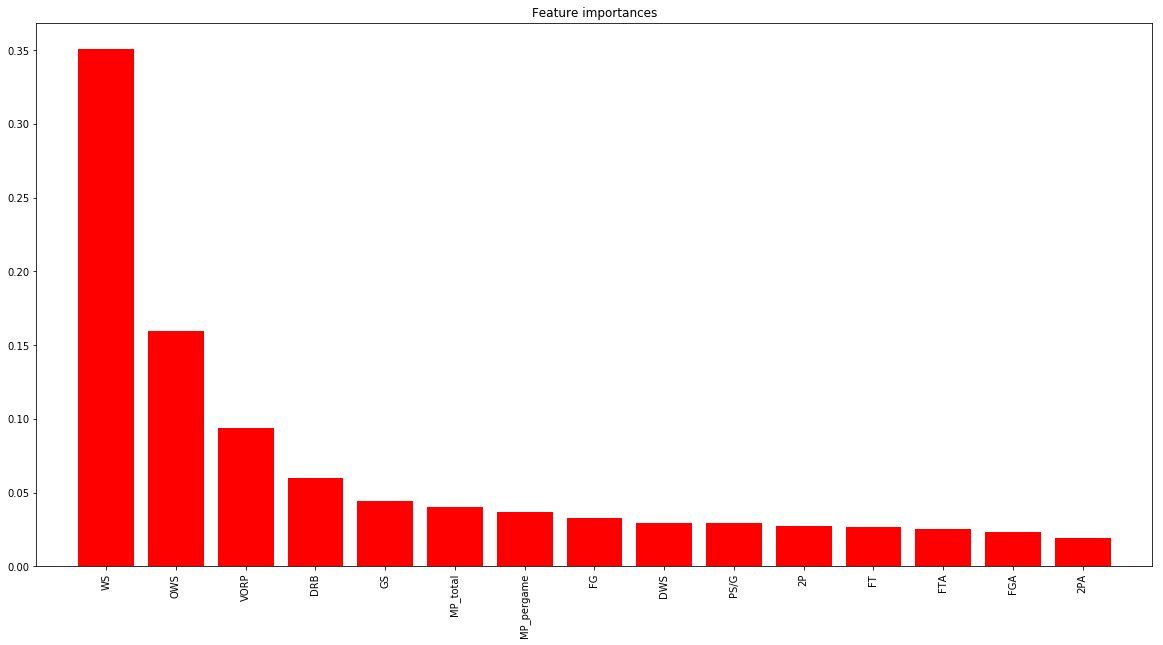

In [10]:
sr.plot_feature_importances(9)

In [12]:
importlib.reload(seasonalregressor)
sr = seasonalregressor.SeasonalRegressor(columns_to_train=cols_to_train_from_correlation)

In [18]:
X, y, _ = sr.create_train_and_predict_X_and_y_of_first_four_seasons(fullstats,demographic,9)

Number of players:  336  with full season data for seasons: {1, 2, 3, 4, 9}
Indices of train set and to-predict set MATCH
Using all columns


In [34]:
importlib.reload(seasonalregressor)
sr = seasonalregressor.SeasonalRegressor(columns_to_train=cols_to_train_from_correlation)

In [35]:
sr = sr.fit(fullstats)

Number of players:  578  with full season data for seasons: {1, 2, 3, 4, 5}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 5
Number of players:  508  with full season data for seasons: {1, 2, 3, 4, 6}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 6
Number of players:  443  with full season data for seasons: {1, 2, 3, 4, 7}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 7
Number of players:  384  with full season data for seasons: {1, 2, 3, 4, 8}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'P

Feature ranking:
1. feature 0 | WS | (0.205545)
2. feature 2 | VORP | (0.165190)
3. feature 1 | OWS | (0.101855)
4. feature 5 | PS/G | (0.069899)
5. feature 9 | FT | (0.065964)
6. feature 11 | FTA | (0.057698)
7. feature 14 | DRB | (0.047863)
8. feature 8 | GS | (0.046634)
9. feature 3 | DWS | (0.045813)
10. feature 4 | MP_total | (0.040051)
11. feature 7 | MP_pergame | (0.036452)
12. feature 13 | 2PA | (0.034406)
13. feature 12 | FGA | (0.034225)
14. feature 6 | FG | (0.026440)
15. feature 10 | 2P | (0.021963)


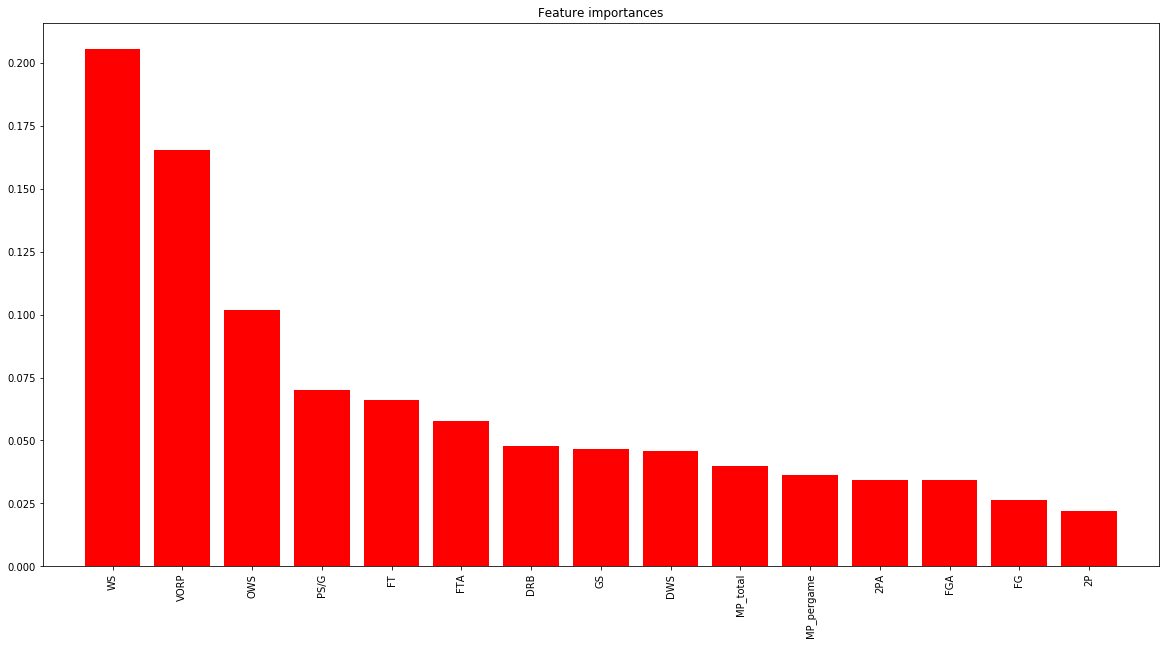

In [32]:
sr.plot_feature_importances(7)

In [33]:
firstfour = sr.get_players_first_x_full_years(fullstats)

Number of players:  699  with full season data for seasons: {1, 2, 3, 4}


In [42]:
len(set.intersection(sr.players_with_fulldata[5],sr.players_with_fulldata[6],sr.players_with_fulldata[7],sr.players_with_fulldata[8],sr.players_with_fulldata[9]))

306

In [43]:
fullplayers = set.intersection(sr.players_with_fulldata[5],sr.players_with_fulldata[6],sr.players_with_fulldata[7],sr.players_with_fulldata[8],sr.players_with_fulldata[9])

These are the 306 players that have year data for each season we're predicting, so for a first pass, we're going to train/test split on them

In [44]:
fullplayers

{'Adonal Foyle',
 'Adrian Griffin',
 'Al Harrington',
 'Al Horford',
 'Al Jefferson',
 'Allen Iverson',
 "Amar'e Stoudemire",
 'Amir Johnson',
 'Anderson Varejao',
 'Andray Blatche',
 'Andre Iguodala',
 'Andre Miller',
 'Andrea Bargnani',
 'Andrei Kirilenko',
 'Andrew Bogut',
 'Andris Biedrins',
 'Antawn Jamison',
 'Anthony Carter',
 'Anthony Johnson',
 'Anthony Morrow',
 'Anthony Tolliver',
 'Antoine Walker',
 'Antonio Daniels',
 'Arron Afflalo',
 'Austin Croshere',
 'Baron Davis',
 'Ben Gordon',
 'Ben Wallace',
 'Beno Udrih',
 'Bobby Jackson',
 'Bonzi Wells',
 'Boris Diaw',
 'Brad Miller',
 'Brandon Bass',
 'Brandon Jennings',
 'Brandon Rush',
 'Brendan Haywood',
 'Brevin Knight',
 'Brian Cardinal',
 'Brian Cook',
 'Brian Scalabrine',
 'Brian Skinner',
 'Brook Lopez',
 'Bruce Bowen',
 'C.J. Miles',
 'C.J. Watson',
 'Calvin Booth',
 'Carl Landry',
 'Carlos Boozer',
 'Carmelo Anthony',
 'Caron Butler',
 'Charlie Villanueva',
 'Chauncey Billups',
 'Chris Bosh',
 'Chris Duhon',
 'Chris K

In [46]:
fullplayers = list(fullplayers)

In [ ]:
Create Train Test-split using random seed = 0

In [52]:
np.random.seed(0)

samplesize = int(len(fullplayers) * .9)

trainplayers = np.random.choice(fullplayers, samplesize, replace=False)
testplayers = [player for player in fullplayers if player not in trainplayers]

In [50]:
len(trainplayers)

275

In [53]:
len(testplayers)

31

In [54]:
len(trainplayers) + len(testplayers)

306

In [63]:
trainplayers = list(trainplayers)

In [64]:
trainplayers

['Steve Francis',
 'Mickael Pietrus',
 'Dahntay Jones',
 'Ruben Patterson',
 'Anthony Morrow',
 'Darren Collison',
 'Andre Miller',
 'Raja Bell',
 'David Lee',
 'Troy Hudson',
 'C.J. Miles',
 'Jodie Meeks',
 'Ryan Anderson',
 'Anthony Johnson',
 'Michael Doleac',
 'Jerome Williams',
 'Austin Croshere',
 'Manu Ginobili',
 'Walter McCarty',
 'Brian Skinner',
 'Shandon Anderson',
 'Anthony Carter',
 'Damon Jones',
 'Jason Richardson',
 'Quentin Richardson',
 'Kenyon Martin',
 'J.J. Redick',
 'Rafer Alston',
 'Marcin Gortat',
 'Amir Johnson',
 'Ben Gordon',
 'Roy Hibbert',
 'Devean George',
 'Stromile Swift',
 'Dwight Howard',
 'Tony Parker',
 'Dan Gadzuric',
 'Matt Bonner',
 'Jeff Teague',
 'Carl Landry',
 'Earl Watson',
 'Jason Maxiell',
 'David West',
 'Matt Barnes',
 'Charlie Villanueva',
 'Derek Fisher',
 'Tony Delk',
 'Ronny Turiaf',
 'Bobby Jackson',
 'Jrue Holiday',
 'Dante Cunningham',
 'Darko Milicic',
 'Corey Brewer',
 'Tracy McGrady',
 'Chris Paul',
 'Tyreke Evans',
 'Paul Mill

In [56]:
testplayers

['Tyronn Lue',
 'Vitaly Potapenko',
 'Kirk Hinrich',
 'Raef LaFrentz',
 'Earl Boykins',
 'Robin Lopez',
 'Andrea Bargnani',
 'Kris Humphries',
 'Goran Dragic',
 'Andris Biedrins',
 'Rasual Butler',
 'Kobe Bryant',
 'Spencer Hawes',
 'Cuttino Mobley',
 'Erick Strickland',
 'Sasha Pavlovic',
 'Shannon Brown',
 'Shawn Marion',
 'Stephon Marbury',
 'Jason Williams',
 'Steve Nash',
 'Jake Voskuhl',
 'Brian Cook',
 'Dwyane Wade',
 'Mike Dunleavy',
 'Antawn Jamison',
 'Brook Lopez',
 'Tony Battie',
 'Francisco Garcia',
 'Bruce Bowen',
 'Jared Jeffries']

In [62]:
importlib.reload(seasonalregressor)

<module 'source.seasonalregressor' from '/Users/kv/workspace/kv-capstone/NBAwinshare/source/seasonalregressor.py'>

Save the train-test split for retrieving later

In [67]:
import pickle
with open('train_test.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([trainplayers, testplayers], f)

In [73]:
with open('train_test.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    trainnames, testnames = pickle.load(f)

In [70]:
trainnames == trainplayers

True

In [74]:
testnames == testplayers

True